# VANESSA ATALANATA — YEARS OF OUTBREAKS

Let's focus on single years of high abundance.

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl
from IPython.display import display
from datetime import date
from matplotlib import cm, colors

In [2]:
sns.set_theme(
    style="darkgrid",
    color_codes=True,
    palette='Dark2',
)

# get hex color codes of Dark2 matplotlib colormap
cmap = cm.get_cmap('Dark2', 8)
hex = []
for i in range(cmap.N):
    rgba = cmap(i)
    # convert rgb(a) to hex
    hex.append(colors.rgb2hex(rgba))

In [3]:
# data import
count_daily = pd.read_csv('../../data/all_species_count_daily.csv',
                          parse_dates=['date'])

count_by_trap = pd.read_csv('../../data/all_species_count_by_trap.csv',
                            parse_dates=['date'])

In [4]:
# focussing on traps L-4 & L-5 exclusively!
count_by_trap = count_by_trap[count_by_trap.trap.str.contains('L-(4|5)')].reset_index(drop=True)

/tmp/ipykernel_23486/566974646.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  count_by_trap = count_by_trap[count_by_trap.trap.str.contains('L-(4|5)')].reset_index(drop=True)


In [5]:
# focus on years 1998 to 2020
count_by_trap_short = count_by_trap[count_by_trap.year >= 1998].reset_index(drop=True)

# combine counts of same cardinal direction for each day
count_by_dir_short = (
    count_by_trap_short
    .groupby(['species', 'year', 'month', 'day', 'date', 'trap_dir'],
             as_index=False)
    ['count'].sum(min_count=1)
)

# add number of week as new column
count_by_dir_short['week'] = count_by_dir_short['date'].dt.isocalendar().week

display(count_by_dir_short)

,species,year,month,day,date,trap_dir,count,week
0,Aglais urticae,1998,4,1,1998-04-01,north,NaN,14
1,Aglais urticae,1998,4,1,1998-04-01,south,NaN,14
2,Aglais urticae,1998,4,2,1998-04-02,north,NaN,14
3,Aglais urticae,1998,4,2,1998-04-02,south,NaN,14
4,Aglais urticae,1998,4,3,1998-04-03,north,NaN,14
...,...,...,...,...,...,...,...,...
148345,Vanessa cardui,2020,10,30,2020-10-30,south,NaN,44
148346,Vanessa cardui,2020,10,31,2020-10-31,north,NaN,44
148347,Vanessa cardui,2020,10,31,2020-10-31,south,NaN,44
148348,Vanessa cardui,2020,11,1,2020-11-01,north,NaN,44


### SEASONAL PATTERN

In [6]:
# some preliminary functions

# convert xlabels to dates
# https://stackoverflow.com/questions/17087314/get-date-from-week-number
def week_to_date(weeknumber):
    return date.fromisocalendar(yr, int(weeknumber), 1)

# find week (and dates) of maximum abundance
def max_count(s, yr):
    # data frame of counts per week
    data = (
        count_by_dir_short[
            (count_by_dir_short.species == s)
          & (count_by_dir_short.year == yr)
        ]
        .groupby(['week', 'trap_dir'], as_index=False)
        ['count'].sum(min_count=1)
    )

    # find maximum count for both directions
    for dir in ['north', 'south']:
        df = data[data['trap_dir'] == dir]
        maxs = df[df['count'] == df['count'].max()]
        print(
            f"{yr}: maximum count of {dir}wards-facing trap:\n",
            f"\t> count = {maxs['count'].values}\n",
            f"\t> date = {week_to_date(maxs['week'].values)}\n",
        )

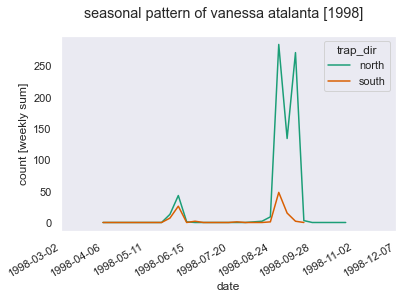

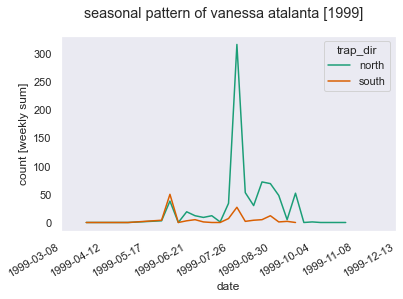

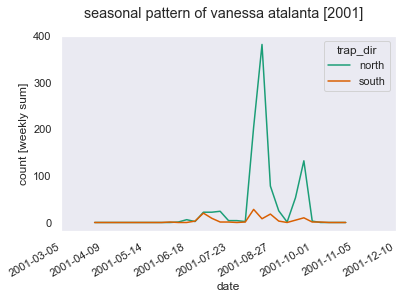

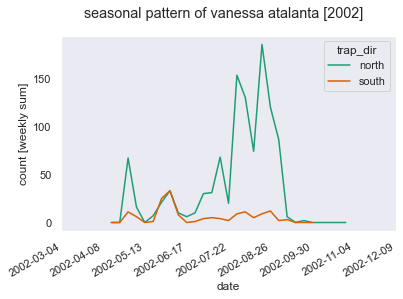

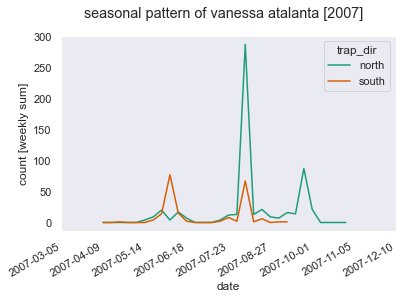

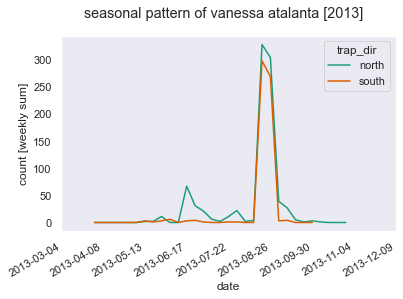

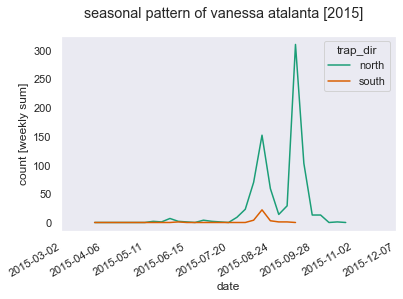

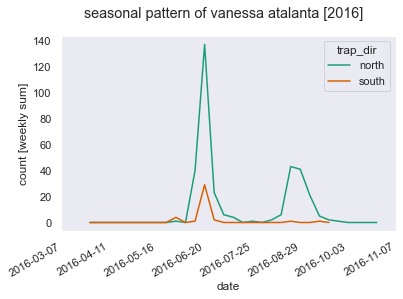

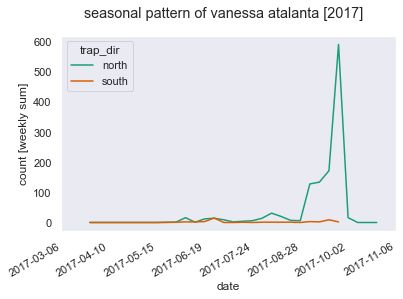

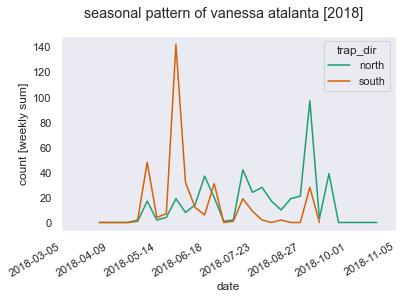

In [7]:
# plotting seasonal signal
def plot_seasonal(s, yr):
    data = (
        count_by_dir_short[
            (count_by_dir_short.species == s)
            & (count_by_dir_short.year == yr)
        ]
        .groupby(['week', 'trap_dir'], as_index=False)
        ['count'].sum(min_count=1)
    )

    fig, ax = plt.subplots()
    sns.lineplot(data=data, x='week', y='count', hue='trap_dir', ax=ax)

    # convert xlabels to dates 
    ticks = plt.xticks()[0]
    dates = [week_to_date(x) for x in ticks]
    plt.xticks(ticks, dates)

    fig.autofmt_xdate()
    ax.grid()
    
    ax.set_ylabel(f'count [weekly sum]')
    ax.set_xlabel('date')
    fig.suptitle(f'seasonal pattern of {s.lower()} [{yr}]')

# for years of outbreaks (spring & autumn!)
yrs_outbreak_va = [1998, 1999, 2001, 2002, 2007, 2013, 2015, 2016, 2017, 2018]
for yr in yrs_outbreak_va:
    #max_count('Vanessa atalanta', yr)
    plot_seasonal('Vanessa atalanta', yr)

### MAXIMUM WEEK

In [8]:
# compute total number of counts per week
count_per_week = (
    count_by_dir_short
    .groupby(['species', 'year', 'week', 'trap_dir'], as_index=False)
    ['count'].sum(min_count=1)
)

years = range(1998, 2021)
max_wk_n = np.zeros(len(years))
max_wk_s = np.zeros(len(years))

for i, yr in enumerate(years):
    data = count_per_week[
        (count_per_week.species == 'Vanessa atalanta')
        & (count_per_week.year == yr)    
    ]

    df_north = data[data['trap_dir'] == 'north']
    df_south = data[data['trap_dir'] == 'south']
    
    max_wk_n[i] = df_north[df_north['count'] == df_north['count'].max()]['week'].values[0]
    max_wk_s[i] = df_south[df_south['count'] == df_south['count'].max()]['week'].values[0]

print(max_wk_n)
print(max_wk_s)

[36. 31. 34. 34. 34. 31. 41. 39. 38. 32. 39. 32. 36. 38. 30. 34. 38. 38.
 25. 39. 36. 24. 38.]
[36. 23. 25. 33. 23. 22. 32. 27. 27. 23. 23. 32. 26. 23. 25. 34. 36. 34.
 25. 26. 22. 24. 24.]


mean north week: 2020-08-17
mean south week: 2020-06-29
p-value for paired t-test:
> p=0.000002


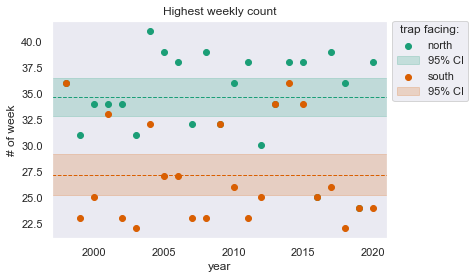

In [9]:
# plotting
fig, ax = plt.subplots()

# north ------------------------------------------------------------------------
ax.scatter(years, max_wk_n, label='north')
mean = np.mean(max_wk_n)
#eom = st.sem(max_wk_n) # error of the mean

# create 95% confidence interval for population mean
# https://www.statology.org/confidence-intervals-python/
ci = st.norm.interval(alpha=0.95, loc=mean, scale=st.sem(max_wk_n))

ax.axhline(mean, c=hex[0], ls='--', lw=1)
ax.fill_between(range(1997, 2022), ci[0], ci[1],
                color=hex[0], alpha=0.2, label='95% CI')
print(f"mean north week: {week_to_date(mean)}")
# ------------------------------------------------------------------------------

# south ------------------------------------------------------------------------
ax.scatter(years, max_wk_s, label='south')
mean = np.mean(max_wk_s)
#eom = st.sem(max_wk_s)

# create 95% confidence interval for population mean
ci = st.norm.interval(alpha=0.95, loc=mean, scale=st.sem(max_wk_s))

ax.axhline(mean, c=hex[1], ls='--', lw=1)
ax.fill_between(range(1997, 2022), ci[0], ci[1], 
                color=hex[1], alpha=0.2, label='95% CI')
print(f"mean south week: {week_to_date(mean)}")
# ------------------------------------------------------------------------------

ax.set_xlim(1997, 2021)
fig.legend(title='trap facing:', bbox_to_anchor=(1.1, 0.9))
ax.set_ylabel('# of week')
ax.set_xlabel('year')
ax.set_title('Highest weekly count')
ax.grid()
fig.savefig(f'../figs/kaliningrad/vatalanta/max_week.png',
            dpi=600, bbox_inches='tight')

# perform paired t-test
# https://www.statology.org/paired-samples-t-test-python/
_, pval = st.ttest_rel(max_wk_n, max_wk_s)
print(f"p-value for paired t-test:\n> p={pval:8f}")
# NOTE: significant!

### MAXIMUM DAY

In [10]:
max_dy_n = []
max_dy_s = []

for i, yr in enumerate(years):
    data = count_by_dir_short[
        (count_by_dir_short.species == 'Vanessa atalanta')
        & (count_by_dir_short.year == yr)    
    ]

    df_north = data[data['trap_dir'] == 'north']
    df_south = data[data['trap_dir'] == 'south']
    
    max_dy_n.append(
        df_north[df_north['count'] == df_north['count'].max()]['date'].dt.dayofyear.values[0]
    )
    max_dy_s.append(
        df_south[df_south['count'] == df_south['count'].max()]['date'].dt.dayofyear.values[0]
    )

print(max_dy_n)
print(max_dy_s)

[261, 216, 240, 232, 211, 213, 278, 270, 262, 219, 269, 219, 254, 263, 275, 235, 144, 260, 177, 271, 249, 162, 259]
[246, 164, 174, 231, 149, 156, 192, 189, 182, 160, 160, 220, 233, 160, 172, 238, 205, 231, 178, 179, 150, 166, 164]


p-value for paired t-test:
> p=0.000038


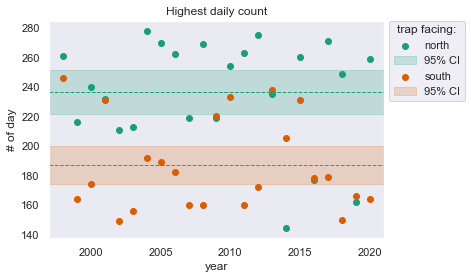

In [11]:
# plotting
fig, ax = plt.subplots()

# north ------------------------------------------------------------------------
ax.scatter(years, max_dy_n, label='north')
mean = np.mean(max_dy_n)

# create 95% confidence interval for population mean
# https://www.statology.org/confidence-intervals-python/
ci = st.norm.interval(alpha=0.95, loc=mean, scale=st.sem(max_dy_n))

ax.axhline(mean, c=hex[0], ls='--', lw=1)
ax.fill_between(range(1997, 2022), ci[0], ci[1],
                color=hex[0], alpha=0.2, label='95% CI')
#print(f"mean north day: {week_to_date(mean)}")
# ------------------------------------------------------------------------------

# south ------------------------------------------------------------------------
ax.scatter(years, max_dy_s, label='south')
mean = np.mean(max_dy_s)

# create 95% confidence interval for population mean
ci = st.norm.interval(alpha=0.95, loc=mean, scale=st.sem(max_dy_s))

ax.axhline(mean, c=hex[1], ls='--', lw=1)
ax.fill_between(range(1997, 2022), ci[0], ci[1], 
                color=hex[1], alpha=0.2, label='95% CI')
#print(f"mean south day: {week_to_date(mean)}")
# ------------------------------------------------------------------------------

ax.set_xlim(1997, 2021)
fig.legend(title='trap facing:', bbox_to_anchor=(1.1, 0.9))
ax.set_ylabel('# of day')
ax.set_xlabel('year')
ax.set_title('Highest daily count')
ax.grid()
fig.savefig(f'../figs/kaliningrad/vatalanta/max_day.png',
            dpi=600, bbox_inches='tight')

# perform paired t-test
# https://www.statology.org/paired-samples-t-test-python/
_, pval = st.ttest_rel(max_dy_n, max_dy_s)
print(f"p-value for paired t-test:\n> p={pval:8f}")
# NOTE: significant!

### PROPORTION OF CARDINAL DIRECTIONS

In [12]:
# compute proportion of both cardinal directions in monthly count
count_per_monthly = (
    count_by_dir_short
    .groupby(['species', 'year', 'month', 'trap_dir'], as_index=False)
    ['count'].sum(min_count=1)
)
# total count per month (both traps combined)
arr_count_weekly = (
    count_by_dir_short
    .groupby(['species', 'year', 'month'])
    ['count'].sum(min_count=1).values
)
arr_count_weekly = np.repeat(arr_count_weekly, repeats=2)

count_per_monthly['count_per'] = count_per_monthly['count'] / arr_count_weekly * 100
count_per_monthly['count_per'] = count_per_monthly['count_per'].fillna(0)

display(count_per_monthly)

,species,year,month,trap_dir,count,count_per
0,Aglais urticae,1998,4,north,0.0,0.0
1,Aglais urticae,1998,4,south,0.0,0.0
2,Aglais urticae,1998,5,north,0.0,0.0
3,Aglais urticae,1998,5,south,0.0,0.0
4,Aglais urticae,1998,6,north,0.0,0.0
...,...,...,...,...,...,...
5515,Vanessa cardui,2020,9,south,1.0,100.0
5516,Vanessa cardui,2020,10,north,0.0,0.0
5517,Vanessa cardui,2020,10,south,NaN,0.0
5518,Vanessa cardui,2020,11,north,NaN,0.0


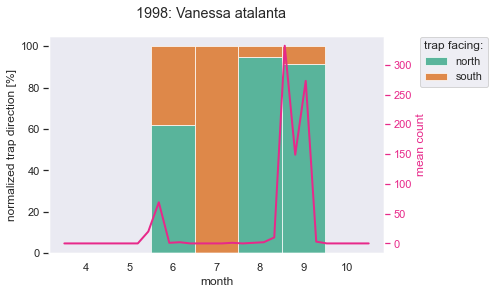

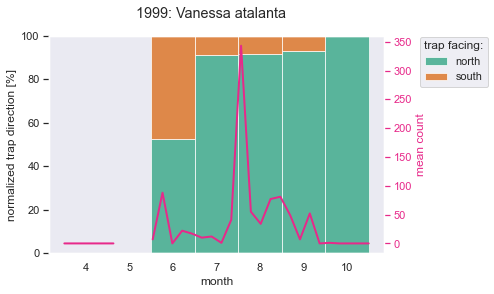

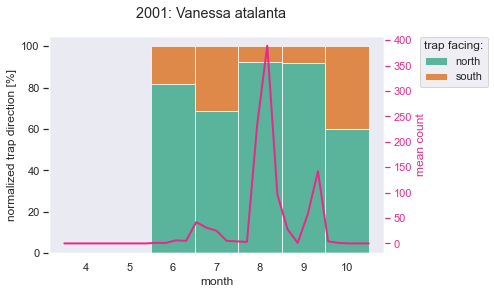

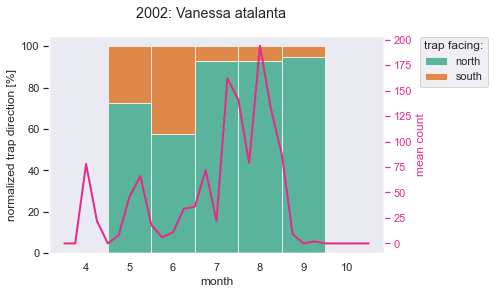

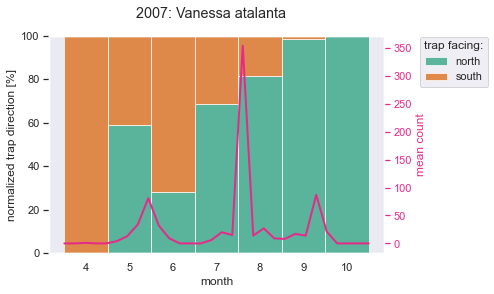

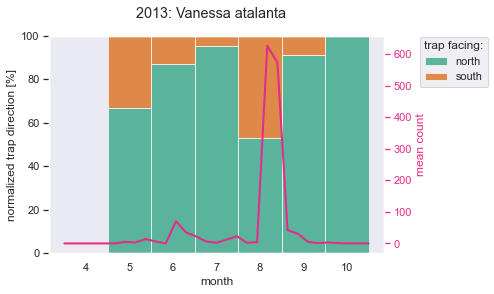

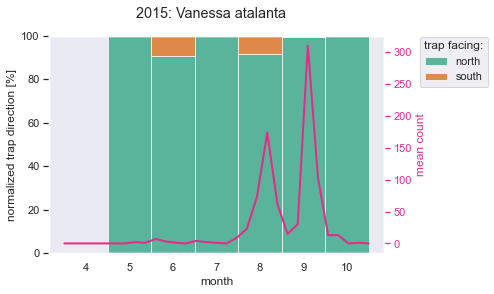

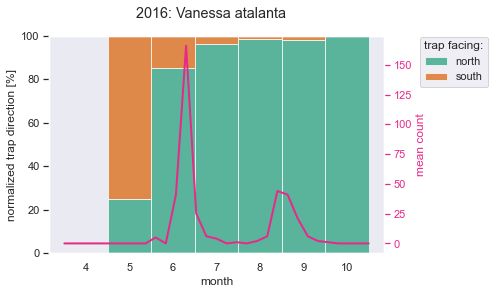

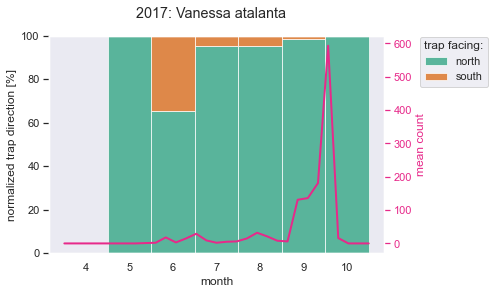

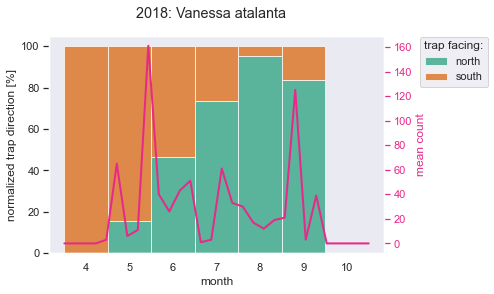

In [13]:
# plotting
sns.set_theme(
    style="dark",
    color_codes=True,
    palette='Dark2',
)

def plot_seasonal_per(s, yr):
    bars = (
        count_per_monthly[
            (count_per_monthly.species == s)
            & (count_per_monthly.year == yr)
            & (count_per_monthly.month < 11) # exclude november
        ]
    )
    line = (
        count_by_dir_short[
            (count_by_dir_short.species == s)
            & (count_by_dir_short.year == yr)
        ]
        .groupby(['week'], as_index=False)
        ['count'].sum(min_count=1)
    )
    months = np.arange(4, 11)

    fig, ax = plt.subplots()
    ax.bar(
        months,
        bars[bars.trap_dir == 'north'].count_per.values,
        label='north', 
        width=1, alpha=0.7
    )
    ax.bar(
        months,
        bars[bars.trap_dir == 'south'].count_per.values,
        label='south',
        bottom=bars[bars.trap_dir == 'north'].count_per.values,
        width=1, alpha=0.7   
    )
    ax.set_ylabel('normalized trap direction [%]')
    ax.set_xlabel('month')
 
    secax = ax.twinx()
    secax.tick_params(axis='y', colors=hex[3])
    secax.set_ylabel('mean count', color=hex[3])
    ssecax = secax.twiny()
    ssecax.tick_params(top=False, labeltop=False)
    ssecax.plot(line['week'], line['count'],
                c=hex[3], lw=2)
    
    fig.legend(title='trap facing:', loc='center left', bbox_to_anchor=(0.97,0.79))
    fig.suptitle(f'{yr}: {s}')

for yr in yrs_outbreak_va:
    plot_seasonal_per('Vanessa atalanta', yr)

### 2013 ANOMALY

In [14]:
count_anom = count_by_dir_short[
    (count_by_dir_short.year == 2013)
    & (count_by_dir_short.species == 'Vanessa atalanta')    
]

count_anom[(count_anom['month'] == 8) & (count_anom['day'] >= 20)]

,species,year,month,day,date,trap_dir,count,week
135302,Vanessa atalanta,2013,8,20,2013-08-20,north,0.0,34
135303,Vanessa atalanta,2013,8,20,2013-08-20,south,0.0,34
135304,Vanessa atalanta,2013,8,21,2013-08-21,north,0.0,34
135305,Vanessa atalanta,2013,8,21,2013-08-21,south,0.0,34
135306,Vanessa atalanta,2013,8,22,2013-08-22,north,0.0,34
135307,Vanessa atalanta,2013,8,22,2013-08-22,south,0.0,34
135308,Vanessa atalanta,2013,8,23,2013-08-23,north,134.0,34
135309,Vanessa atalanta,2013,8,23,2013-08-23,south,45.0,34
135310,Vanessa atalanta,2013,8,24,2013-08-24,north,74.0,34
135311,Vanessa atalanta,2013,8,24,2013-08-24,south,93.0,34


In [15]:
count_by_dir_short

,species,year,month,day,date,trap_dir,count,week
0,Aglais urticae,1998,4,1,1998-04-01,north,NaN,14
1,Aglais urticae,1998,4,1,1998-04-01,south,NaN,14
2,Aglais urticae,1998,4,2,1998-04-02,north,NaN,14
3,Aglais urticae,1998,4,2,1998-04-02,south,NaN,14
4,Aglais urticae,1998,4,3,1998-04-03,north,NaN,14
...,...,...,...,...,...,...,...,...
148345,Vanessa cardui,2020,10,30,2020-10-30,south,NaN,44
148346,Vanessa cardui,2020,10,31,2020-10-31,north,NaN,44
148347,Vanessa cardui,2020,10,31,2020-10-31,south,NaN,44
148348,Vanessa cardui,2020,11,1,2020-11-01,north,NaN,44
